# Seaborn Examples

## Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 

## Settings

In [2]:
sns.set(context='notebook', 
        style='whitegrid', 
        palette='Blues', 
        font='sans-serif', 
        font_scale=1, 
        color_codes=True, 
        rc={'axes.edgecolor':'gray'})

plt.rcParams['figure.dpi'] = 360

## Data

In [3]:
df = pd.read_csv('gapminder.tsv', sep='\t')

In [4]:
df.head(3)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710


In [5]:
df_1952 = df.loc[df['year']==1952]
df_1952_median = df_1952['lifeExp'].median()

In [6]:
df_2007 = df.loc[df['year']==2007]
df_2007_median = df_2007['lifeExp'].median()

## Plots

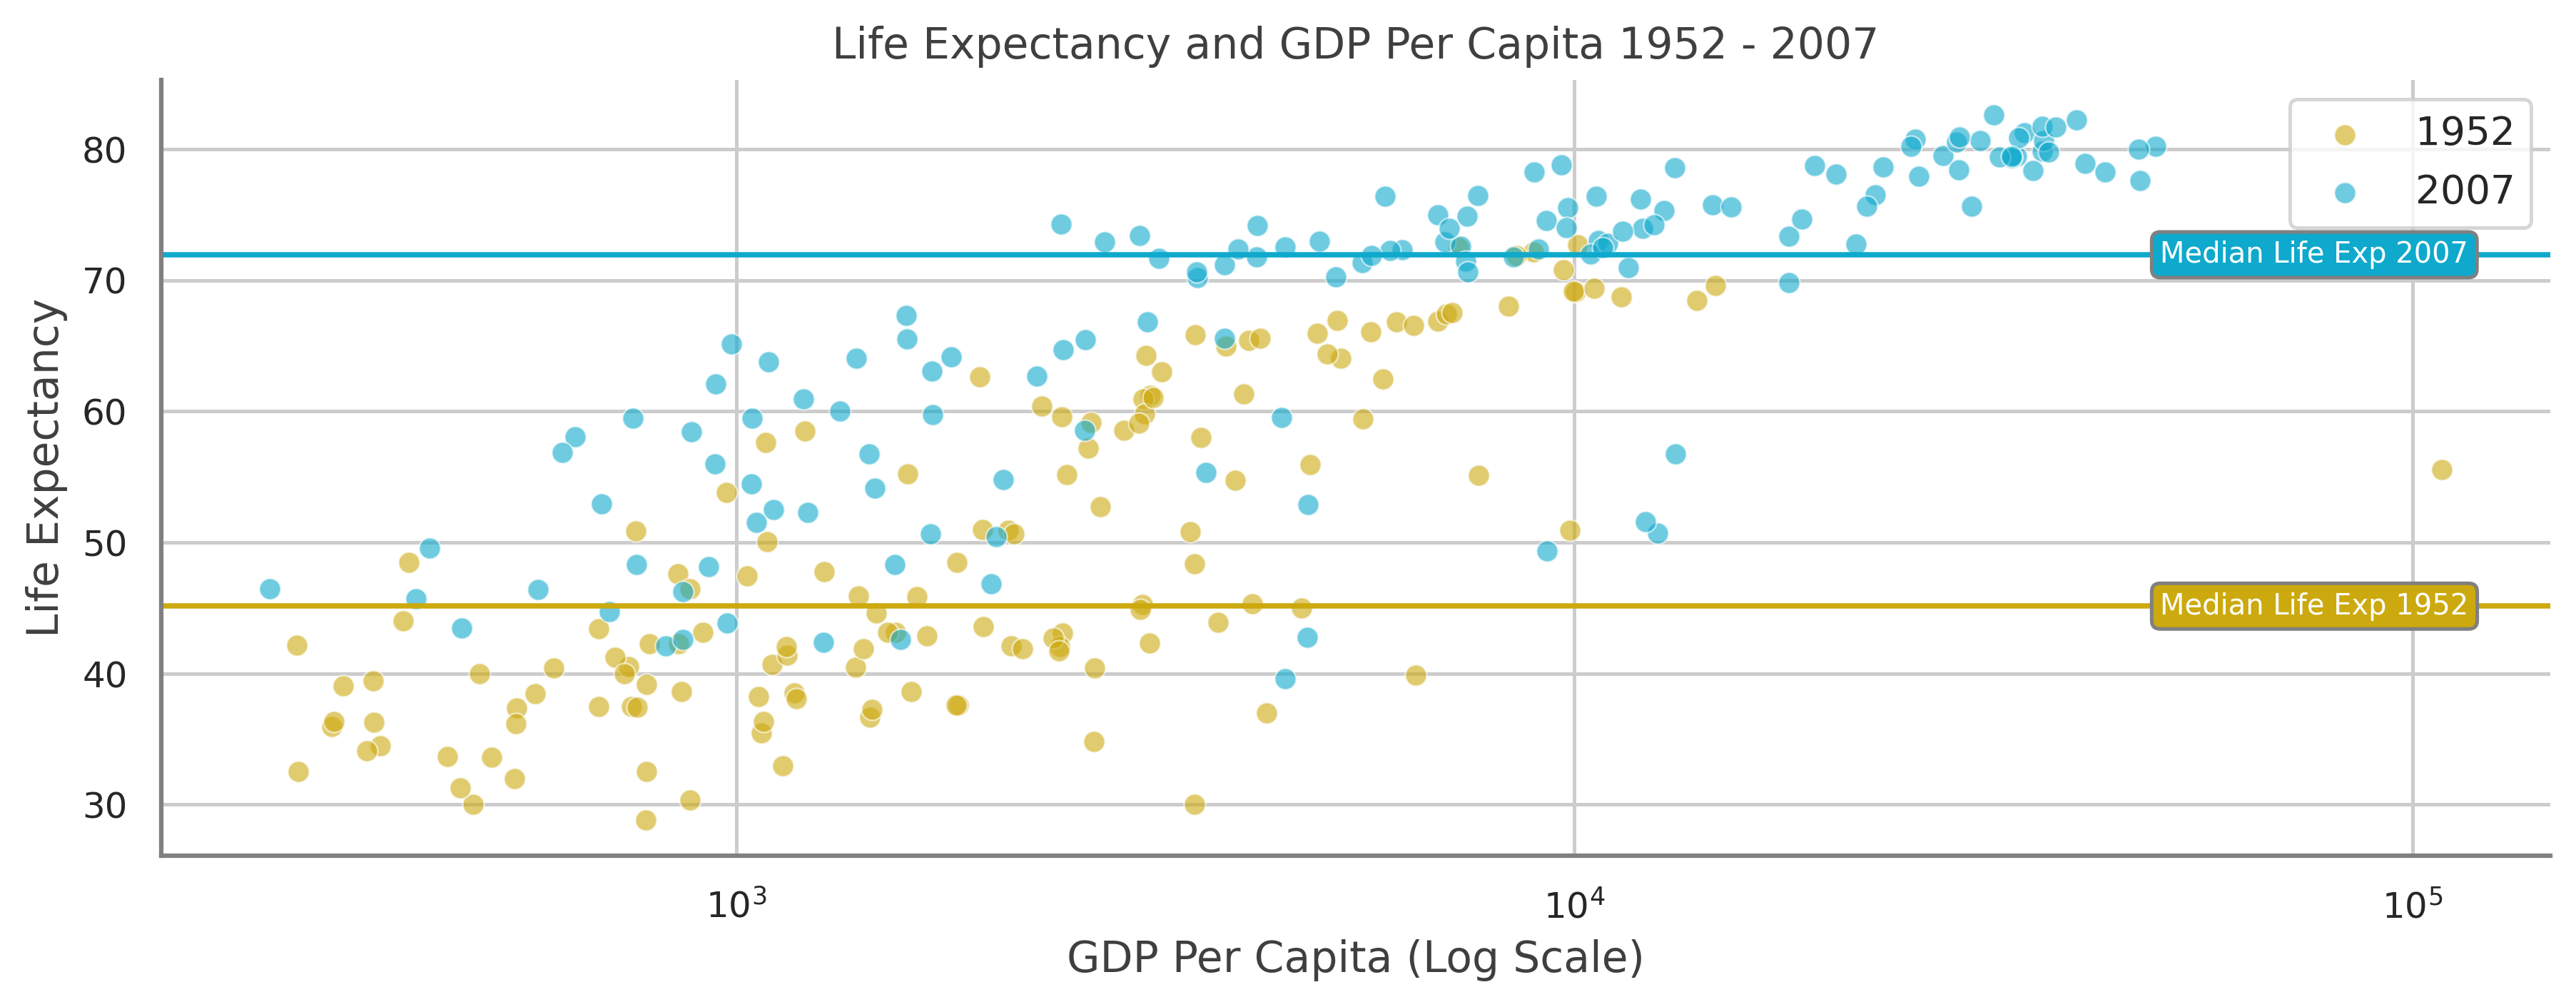

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.scatterplot(data=df_1952, x='gdpPercap', y='lifeExp', color='#cca90e', alpha=0.6, label='1952')

sns.scatterplot(data=df_2007, x='gdpPercap', y='lifeExp', color='#0ea9cc', alpha=0.6, label='2007', ax=ax)

# configure the style elements of the plot
plt.title('Life Expectancy and GDP Per Capita 1952 - 2007', fontsize=12, color='#3F3F41')
plt.ylabel('Life Expectancy', fontsize=12, color='#3F3F41')
plt.xlabel('GDP Per Capita (Log Scale)', fontsize=12, color='#3F3F41')
ax.set(xscale="log")
plt.tick_params(labelsize=10, color='#3F3F41')
plt.axhline(y=df_1952_median, color='#cca90e');
plt.axhline(y=df_2007_median, color='#0ea9cc');
sns.despine();

# add text labels in rounded-edged box
# with text grey and fill colour relevant to the associated data
text_1952 = ax.text(50000, df_1952_median, "Median Life Exp 1952", # position and text string
            color='white',
            ha="left", # left alignment
            va="center", # vertical alignment
            size=8, # text size
            bbox={'fc':'#cca90e', # face color is yellow
                  'alpha':1, # transparancy
                  'ec':'grey', # edge colour is grey
                  'boxstyle':'round'}) # rounded edges

text_2007 = ax.text(50000, df_2007_median, "Median Life Exp 2007", # position and text string
            color='white',
            ha="left", # left alignment
            va="center", # vertical alignment
            size=8, # text size
            bbox={'fc':'#0ea9cc', # face color is blue
                  'alpha':1, # transparancy
                  'ec':'grey', # edge colour is grey
                  'boxstyle':'round'}) # rounded edges

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


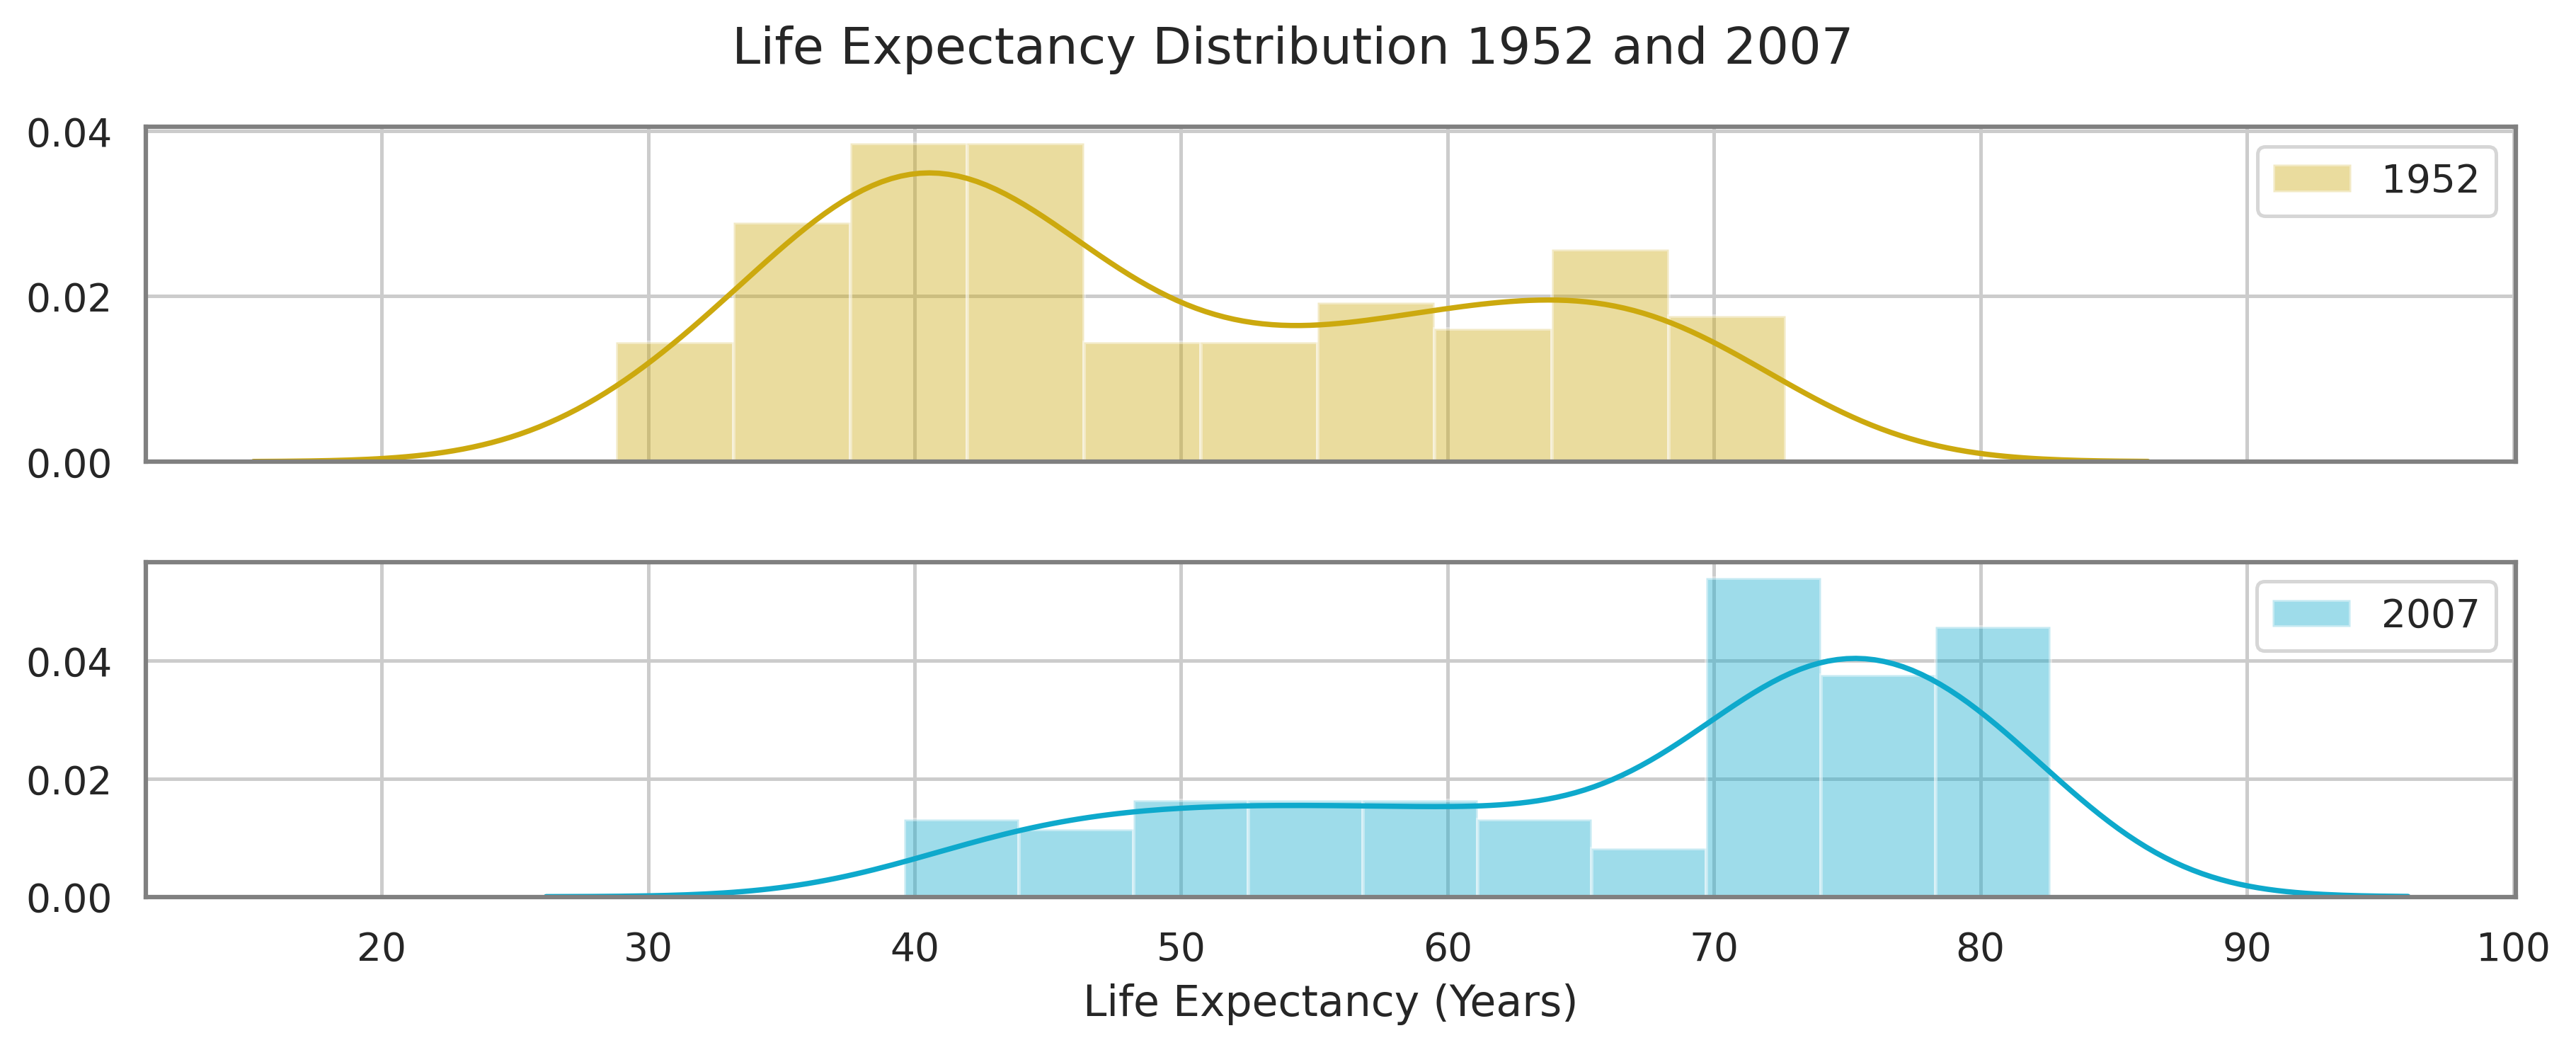

In [8]:
# create a figure of size (12,4) and an axis to draw plots on
fig, axes = plt.subplots(nrows=2,         # show one plot below the other
                         sharex=True,     # the plots should share the same x axis
                         figsize=(12,4))

# create a combined histogram and density plot (distplot) for 1952 
sns.distplot(df_1952['lifeExp'], 
             ax=axes[0],            # this plot shoud be shown in the 1st row (position 0)
             bins=10, 
             color='#cca90e',
             label='1952')

# create a combined histogram and density plot (distplot) for 2007
sns.distplot(df_2007['lifeExp'],
             ax=axes[1],            # this plot should be shown in the 2nd row (position 1) 
             bins=10, 
             color='#0ea9cc',
             label='2007')

# Add one legend per plot showing the label of that plot
axes[0].legend()
axes[1].legend()

# Add a title
fig.suptitle('Life Expectancy Distribution 1952 and 2007')

# Rename axis labels
axes[0].set(xlabel = 'Life Expectancy (Years)', ylabel = '')
axes[1].set(xlabel = 'Life Expectancy (Years)', ylabel = '')

# Add more white space between the 2 plots
fig.subplots_adjust(hspace=0.3, wspace=0.3);

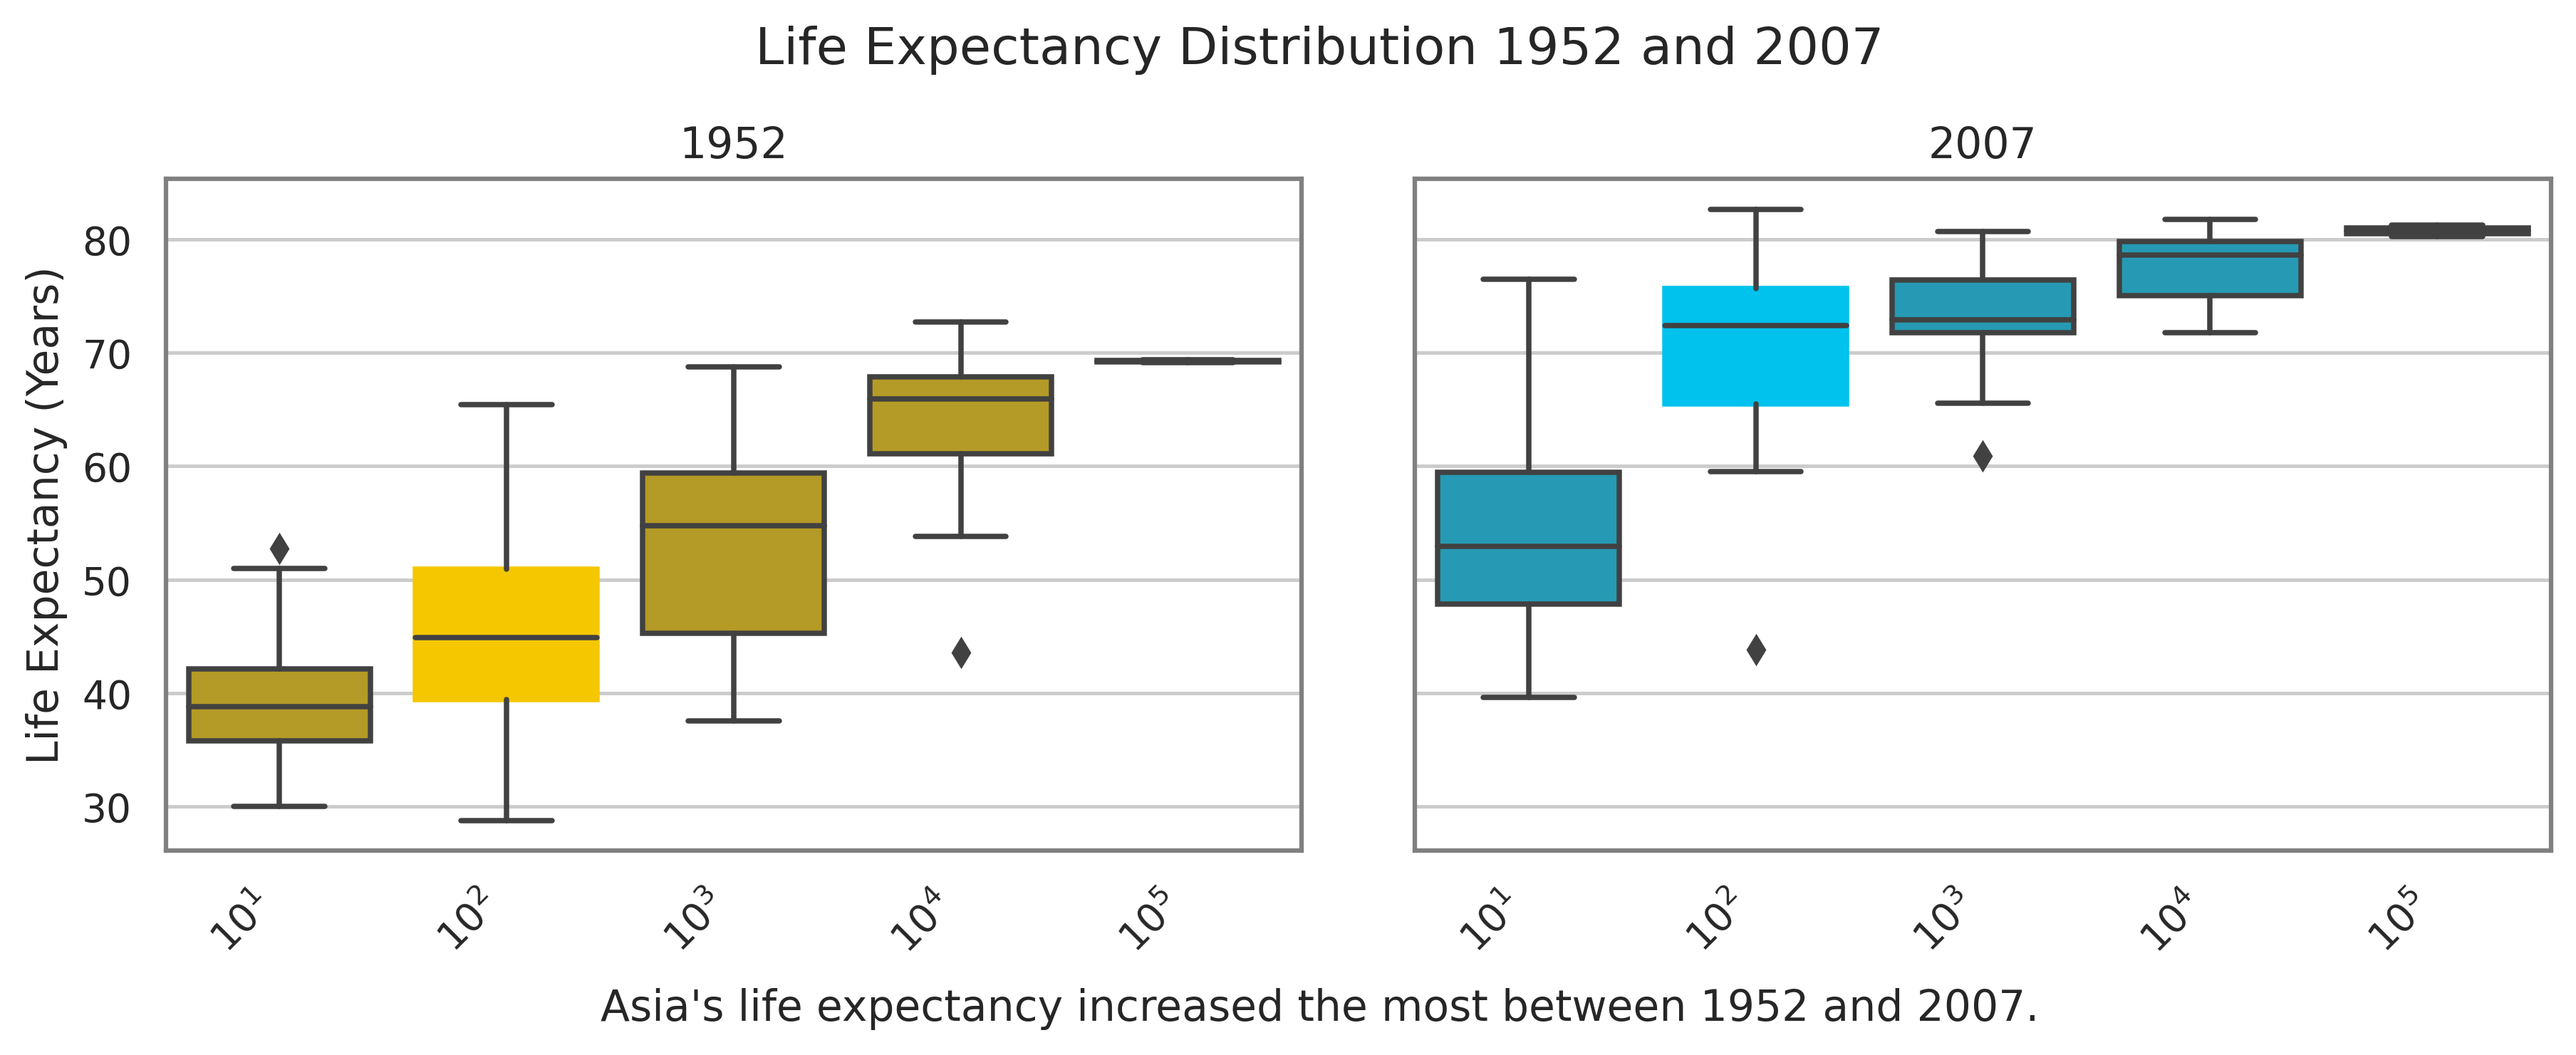

In [9]:
# create a figure of size (12,4) and an axis to draw plots on
fig, axes = plt.subplots(ncols=2,         # show one plot next to the other
                         sharey=True,     # the plots should share the same x axis
                         figsize=(12,4))

# create box plots of life expectancy per continent in 1952
sns.boxplot(data=df_1952, x='continent', y='lifeExp', 
            ax=axes[0],
            order=['Africa', 'Asia', 'Americas', 'Europe', 'Oceania'],
            color='#cca90e'
           )

# create box plots of life expectancy per continent in 2007
sns.boxplot(data=df_2007, x='continent', y='lifeExp', 
            ax=axes[1],
            order=['Africa', 'Asia', 'Americas', 'Europe', 'Oceania'],
            color='#0ea9cc'
           )

# Add a title
fig.suptitle('Life Expectancy Distribution 1952 and 2007')

# Rename axis labels
axes[0].set(ylabel = 'Life Expectancy (Years)', xlabel = '')
axes[1].set(ylabel = '', xlabel = '')

# display the x tick labels rotated at 45 degrees and
# horizontalalignment is 'right'
axes[0].set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
axes[1].set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

# Bring plots closer together
fig.subplots_adjust(hspace=0.1, wspace=0.1)

axes[0].set_title('1952')
axes[1].set_title('2007')

# highlight Asia in a brighter shade
axes[0].get_children()[31].set_color('#f5c700')
axes[1].get_children()[31].set_color('#00c2ed')

# add a caption below the figure
caption = "Asia's life expectancy increased the most between 1952 and 2007."
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)

# add space between x axis labels and the caption
plt.subplots_adjust(bottom=0.175, top=0.83)

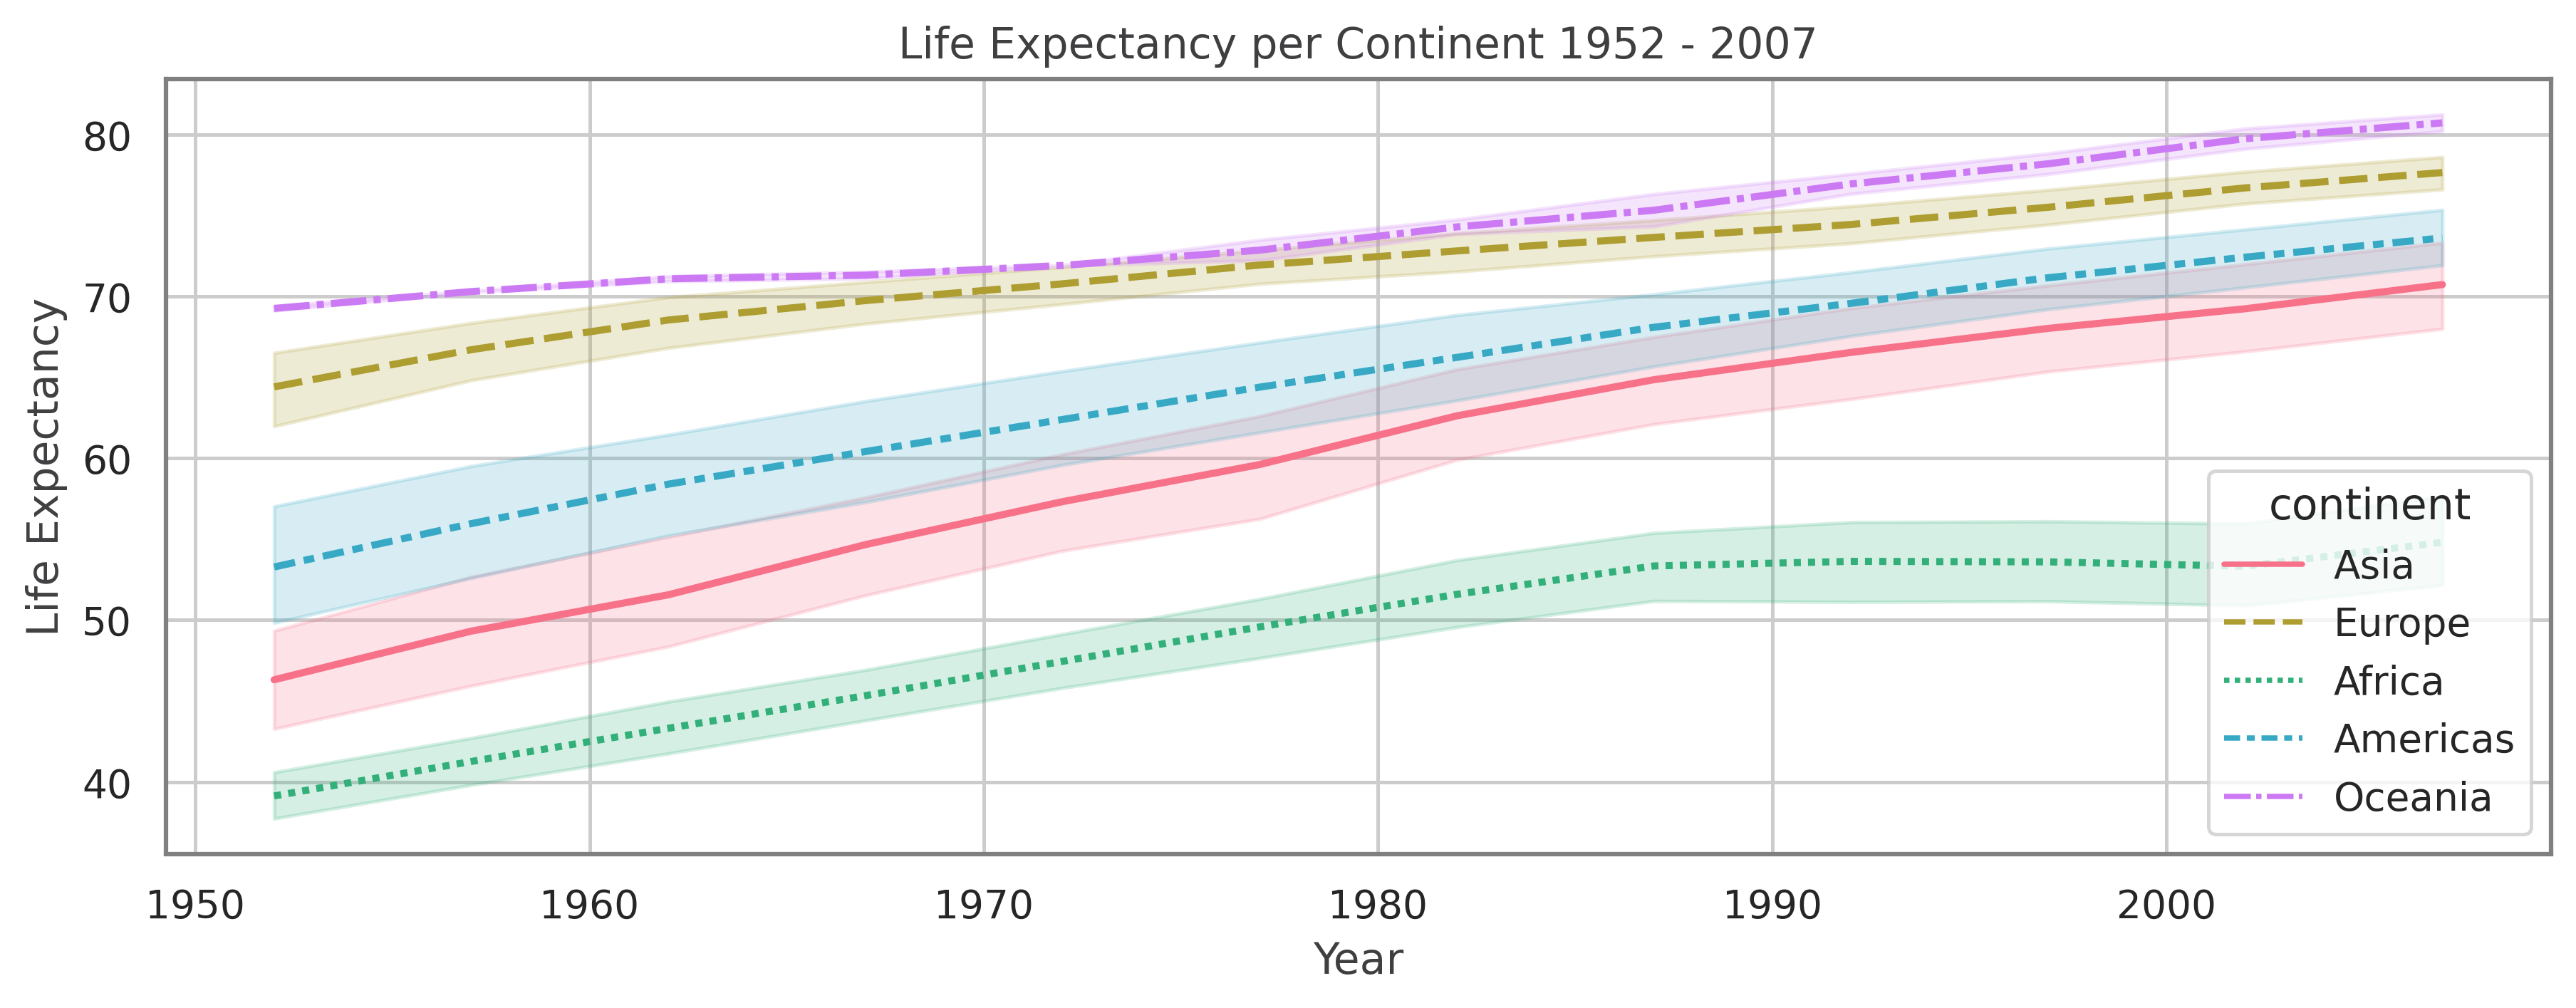

In [10]:
# create a line plot with one line per continent, where the
# colour and line symbol represents the continent
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(x='year',y='lifeExp', data=df, 
             hue='continent', 
             palette = sns.color_palette("husl", 5),
             lw=2, # line width
             style='continent')

# configure the style elements of the plot
plt.title('Life Expectancy per Continent 1952 - 2007', fontsize=12, color='#3F3F41')
plt.ylabel('Life Expectancy', fontsize=12, color='#3F3F41')
plt.xlabel('Year', fontsize=12, color='#3F3F41');

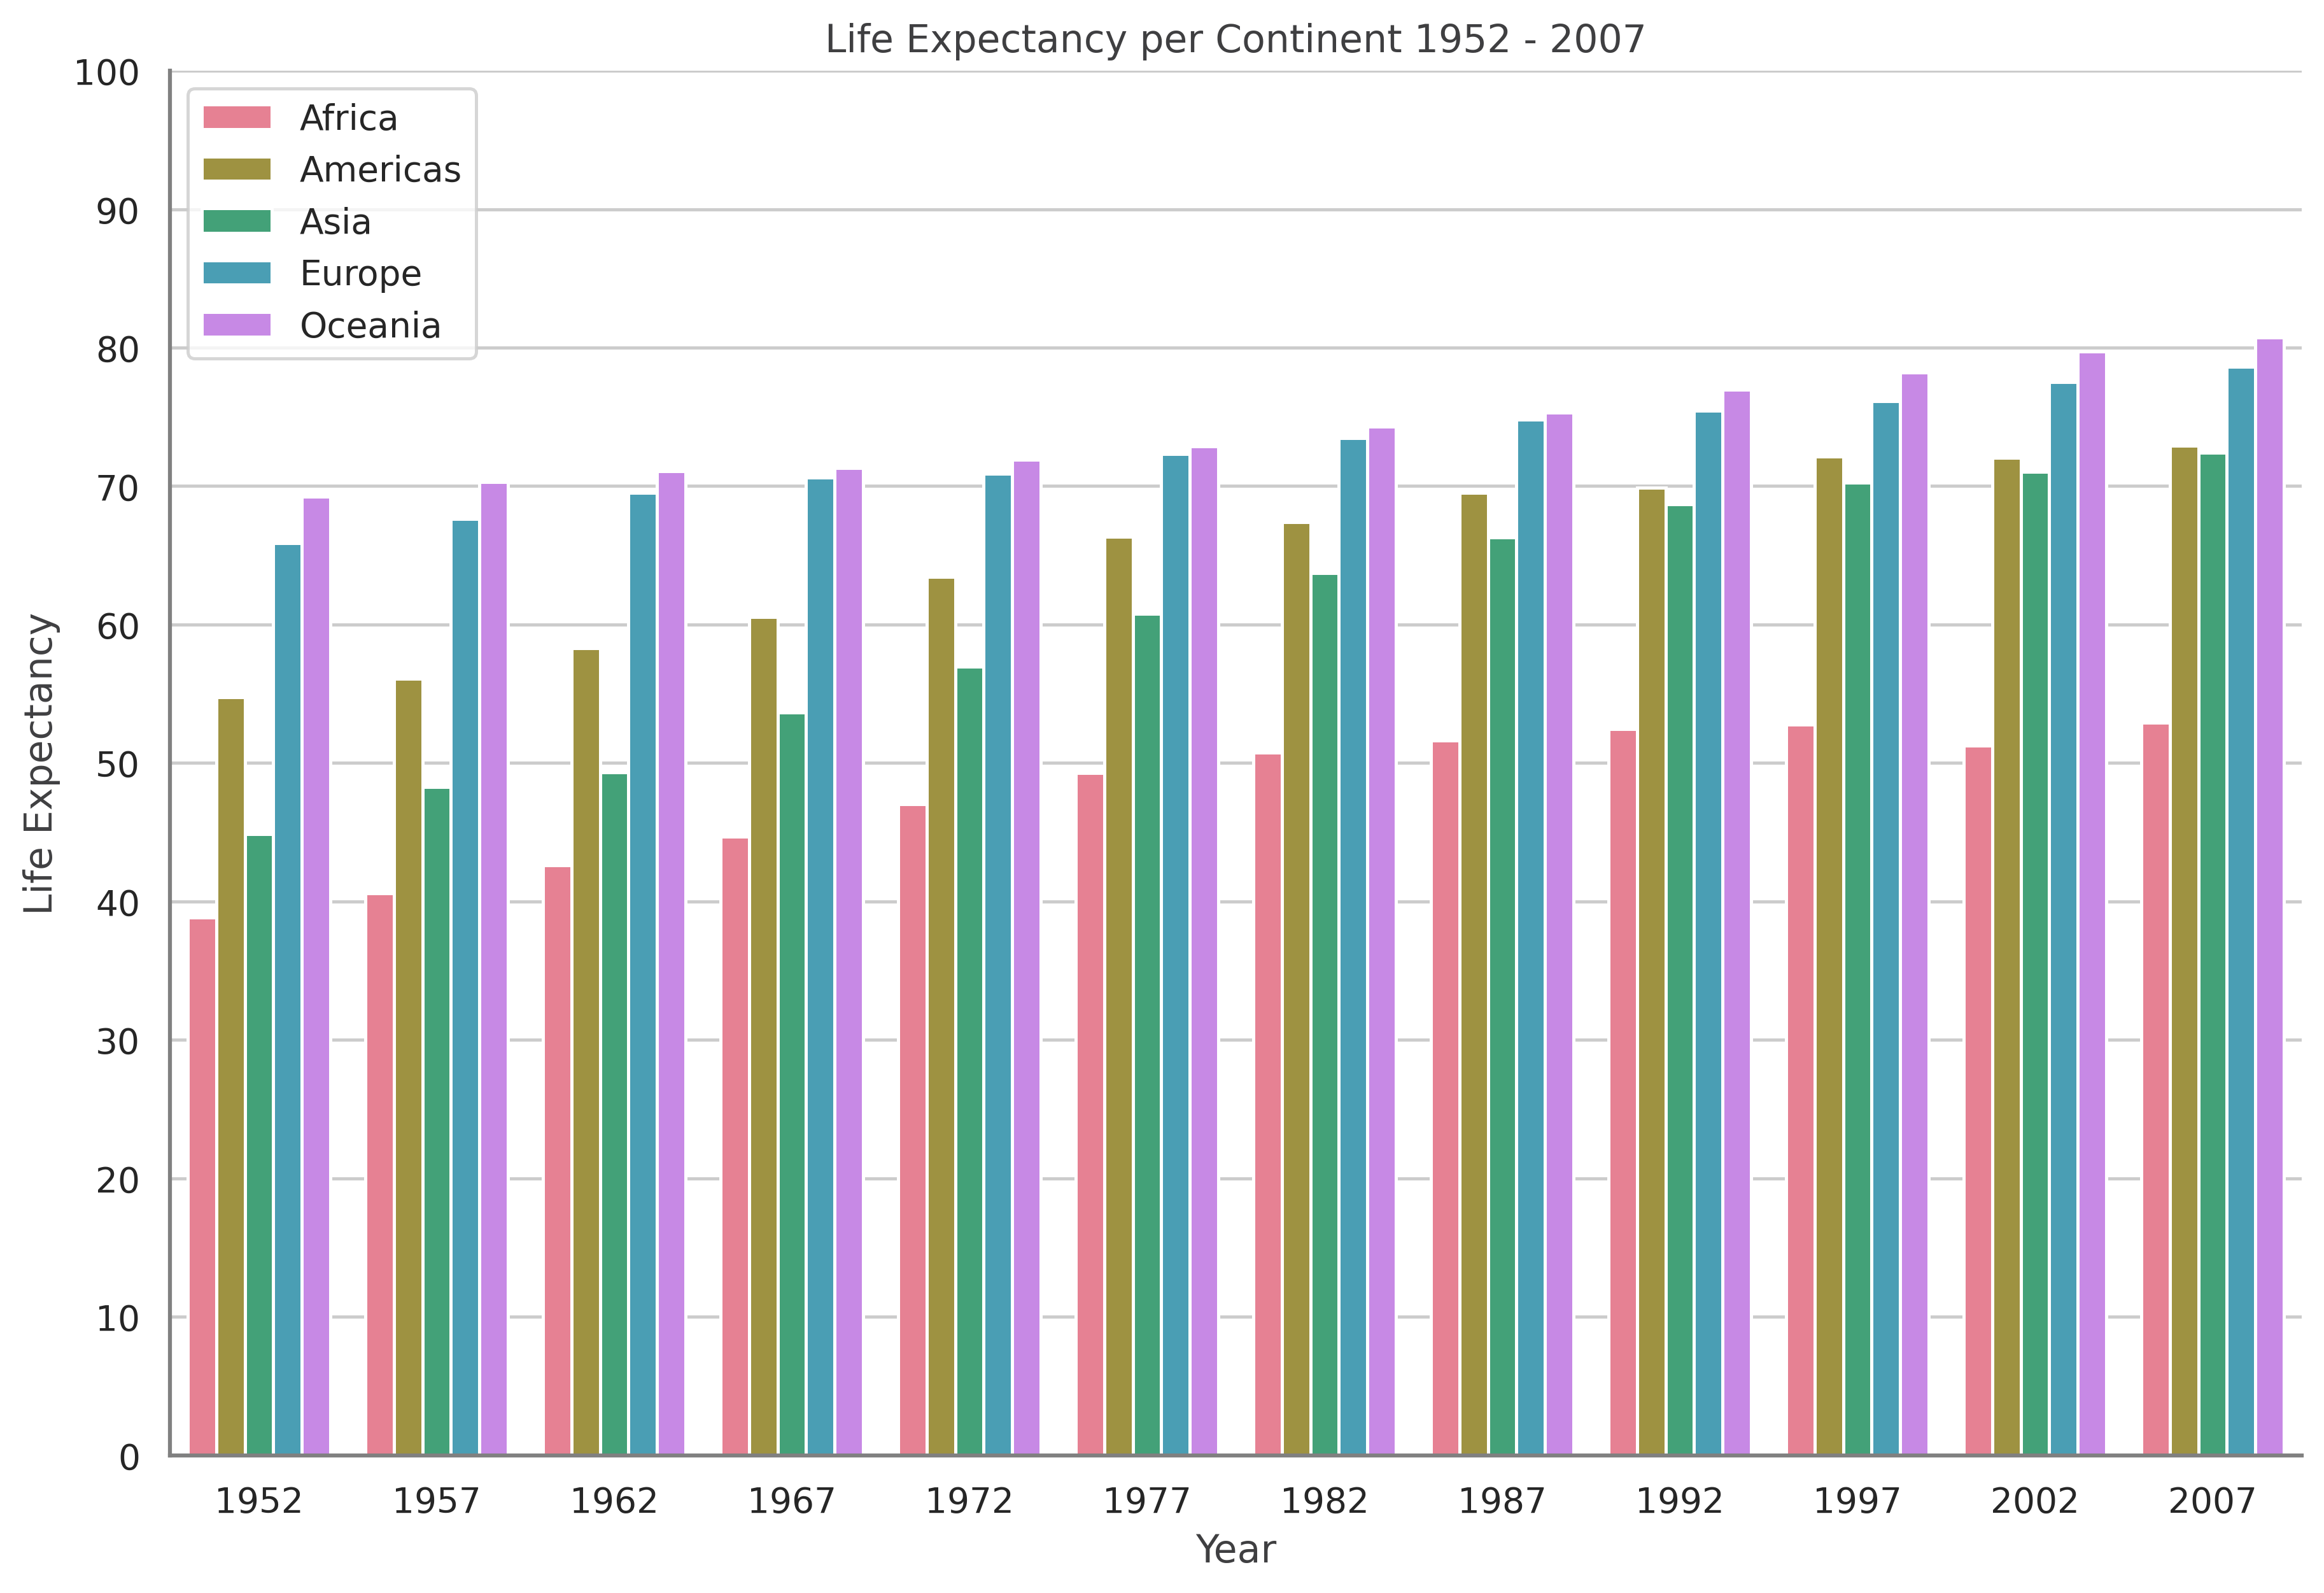

In [11]:
# create a dataframe where there's one row per continent per year showing median lifeExp
cont_yr_medians = pd.DataFrame(df.groupby(['continent', 'year'])['lifeExp'].median())
cont_yr_medians = cont_yr_medians.reset_index()

#create a figure of size (12,8) and an axis to draw plots on
fig, ax = plt.subplots(figsize=(12,8))

# draw a grouped bar plot where colour represents the continent
sns.barplot(y='lifeExp', x='year', data=cont_yr_medians, hue='continent', palette=sns.color_palette("husl", 5))

# Show 11 numbers, between 0 and 100 inclusive, as the y axis ticks
ax.set_yticks(np.linspace(0,100,11))

# configure the style elements of the plot
plt.title('Life Expectancy per Continent 1952 - 2007', fontsize=12, color='#3F3F41')
plt.ylabel('Life Expectancy', fontsize=12, color='#3F3F41')
plt.xlabel('Year', fontsize=12, color='#3F3F41')
plt.legend(title="")
sns.despine();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


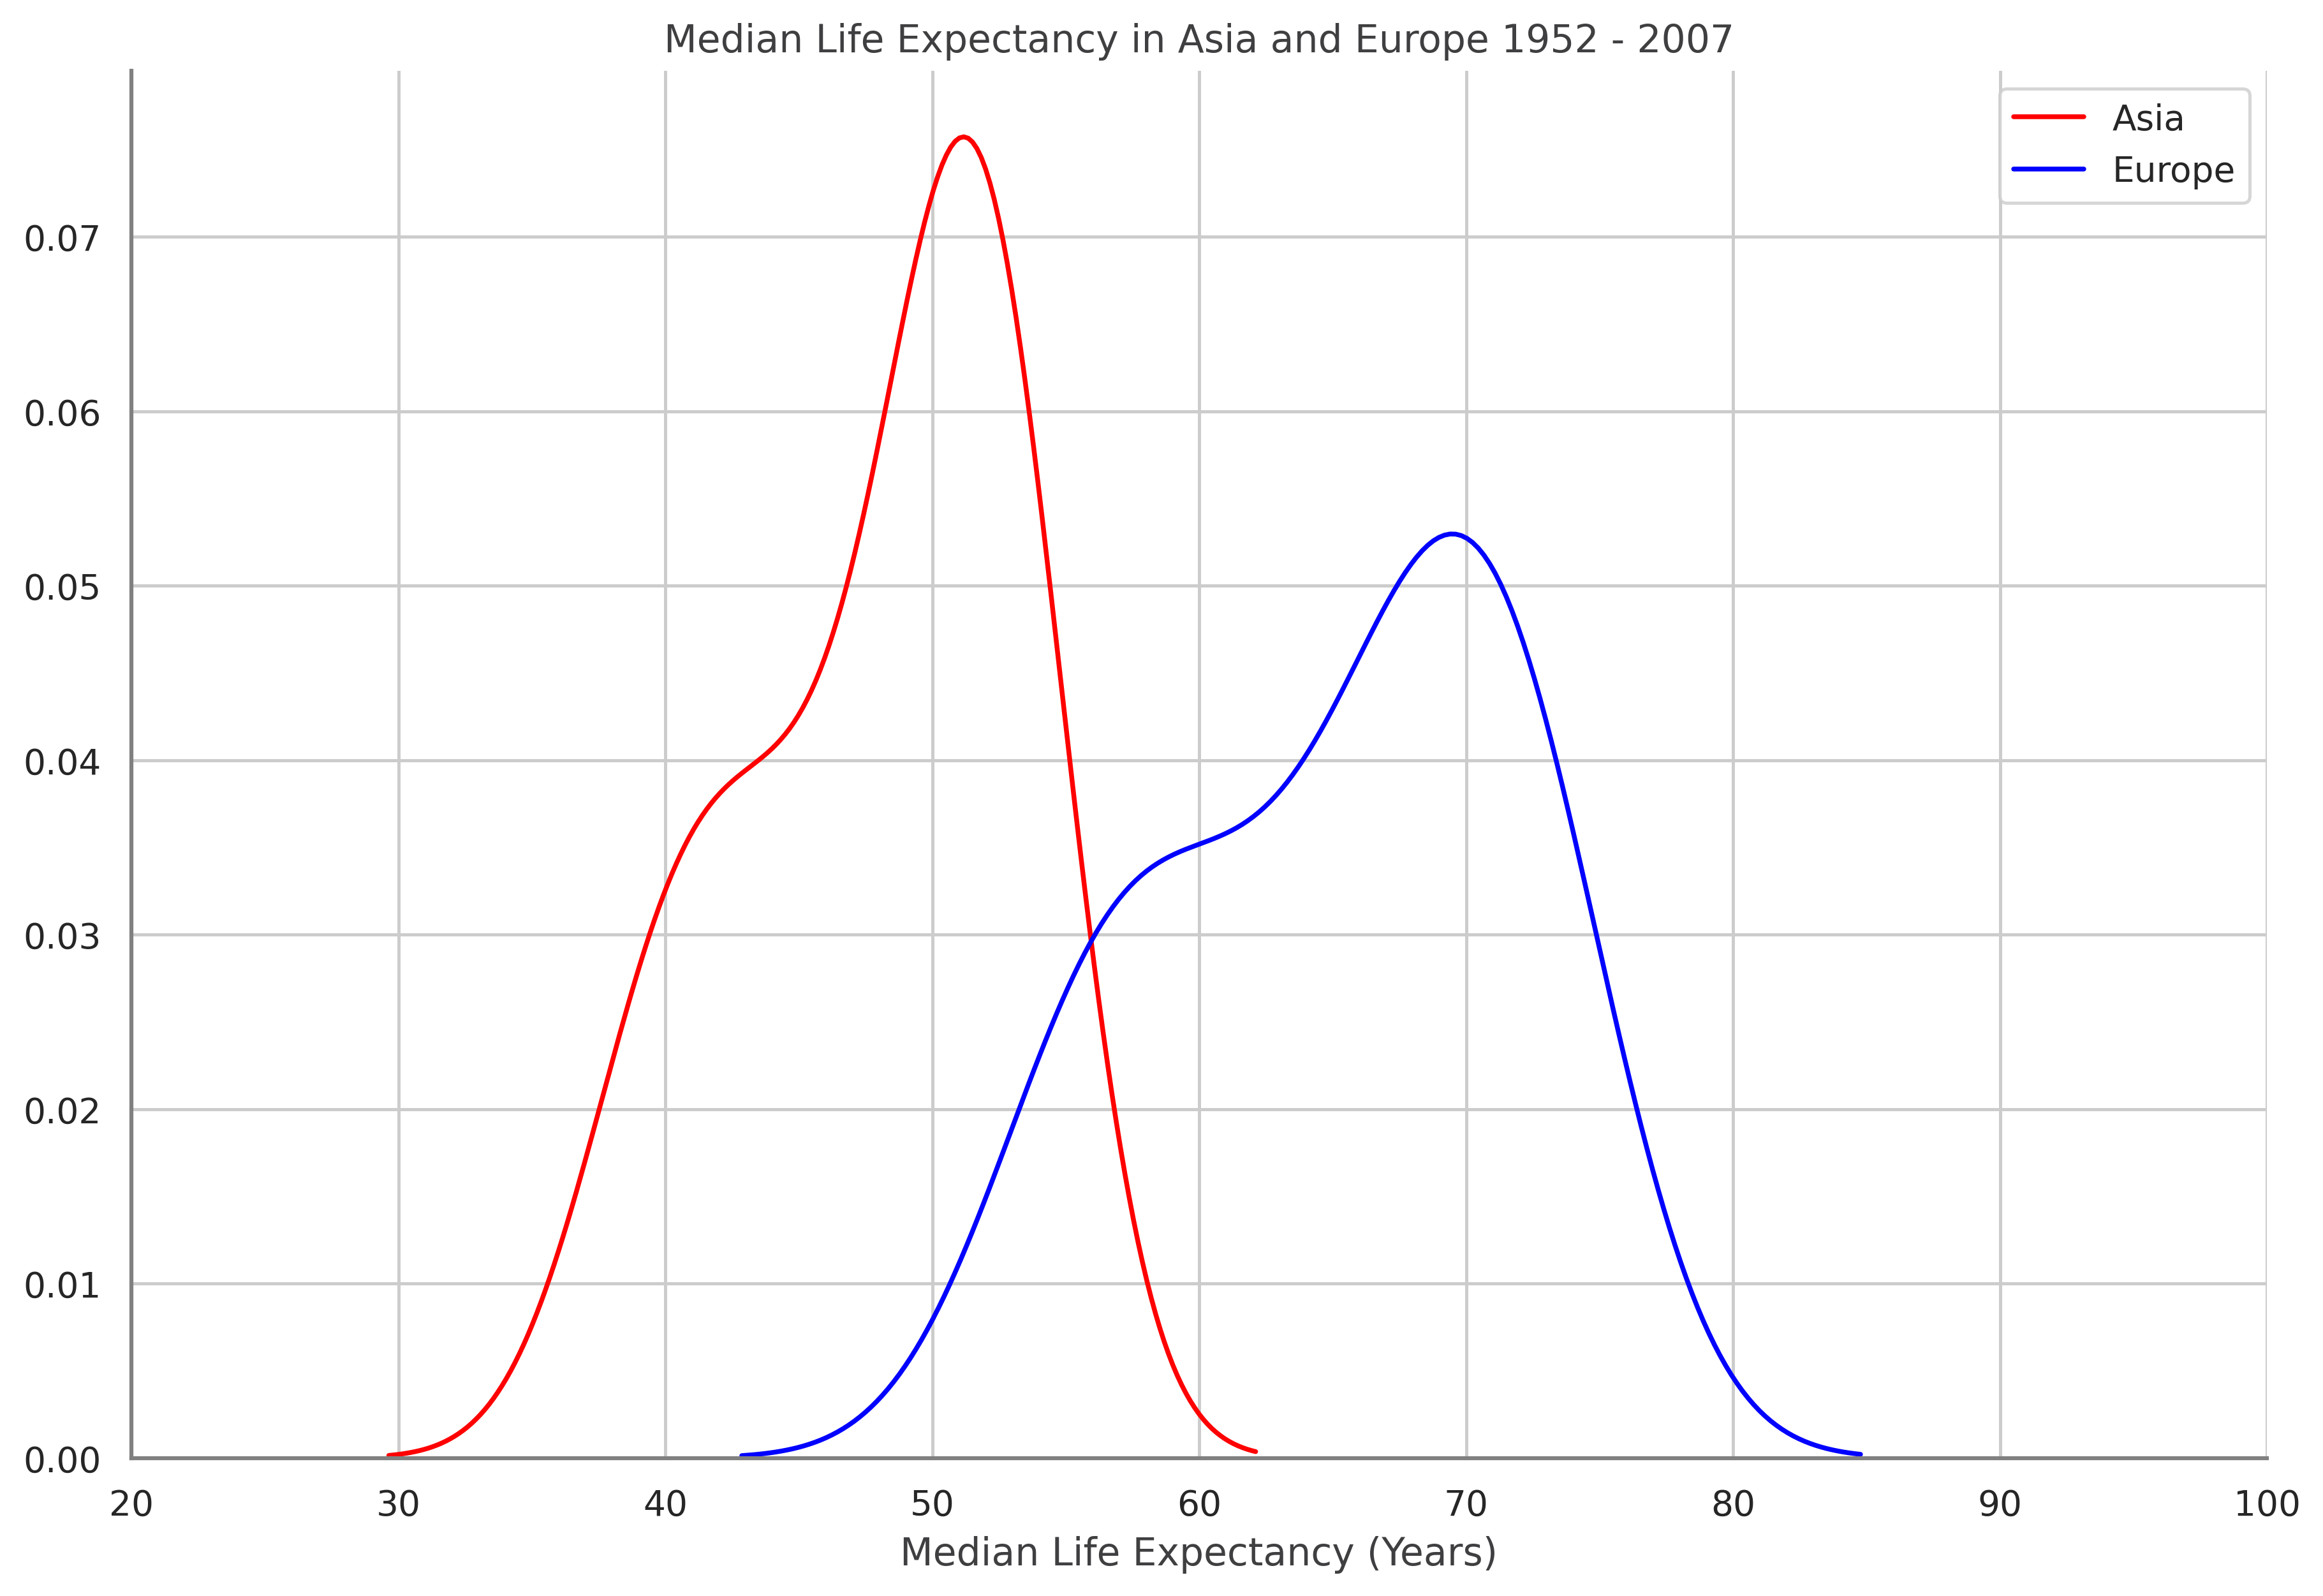

In [12]:
# create a figure of size (12,8) and an axis to draw plots on
fig, ax = plt.subplots(figsize=(12,8))

# plot 2 density plots on the same axis to compare the median lifeExp distribution for Asia and Europe
sns.distplot(cont_yr_medians['lifeExp'][df['continent']=="Asia"], hist=False, color='red', ax=ax, label='Asia')
sns.distplot(cont_yr_medians['lifeExp'][df['continent']=="Europe"], hist=False, color='blue', ax=ax, label='Europe')

# configure plot elements
plt.title('Median Life Expectancy in Asia and Europe 1952 - 2007', fontsize=12, color='#3F3F41')
plt.ylabel('')
plt.xlabel('Median Life Expectancy (Years)', fontsize=12, color='#3F3F41')
ax.legend()
ax.set_xlim(left=20, right=100)
sns.despine();